# scikit-FIBERS: HLA Notebook (First FIBERS Paper Data)


***
## Imports:

In [1]:
import os
import pickle
import pandas as pd
from sklearn.metrics import classification_report
from src.skfibers.fibers import FIBERS

current_working_directory = os.getcwd()
print(current_working_directory)

#Local Run Parameters
local_save = False
folder_path = 'C:/Users/ryanu/Desktop/HLA_output_log_rank'
if not os.path.exists(folder_path):
        os.makedirs(folder_path)
if local_save:
    output_folder = 'local_output'
else:
    output_folder = folder_path

c:\Users\ryanu\OneDrive\Documents\GitHub\scikit-FIBERS


***
## Load and Prepare HLA Data

In [2]:
data_path = 'C:/Users/ryanu/Desktop/HLA/Imp1/Imp1.csv'
data_name = 'Imp1'
data = pd.read_csv(data_path,low_memory=False)

#Define key column names to be used in analysis
outcome_label = "graftyrs"
censor_label = "grf_fail"
amino_acids = ['A1', 'A10', 'A100', 'A101', 'A102', 'A103', 'A104', 'A105', 'A106', 'A107', 'A108', 'A109', 'A11', 'A110', 'A111', 'A112', 'A113', 'A114', 'A115', 'A116', 'A117', 'A118', 'A119', 'A12', 'A120', 'A121', 'A122', 'A123', 'A124', 'A125', 'A126', 'A127', 'A128', 'A129', 'A13', 'A130', 'A131', 'A132', 'A133', 'A134', 'A135', 'A136', 'A137', 'A138', 'A139', 'A14', 'A140', 'A141', 'A142', 'A143', 'A144', 'A145', 'A146', 'A147', 'A148', 'A149', 'A15', 'A150', 'A151', 'A152', 'A153', 'A154', 'A155', 'A156', 'A157', 'A158', 'A159', 'A16', 'A160', 'A161', 'A162', 'A163', 'A164', 'A165', 'A166', 'A167', 'A168', 'A169', 'A17', 'A170', 'A171', 'A172', 'A173', 'A174', 'A175', 'A176', 'A177', 'A178', 'A179', 'A18', 'A180', 'A181', 'A182', 'A183', 'A184', 'A185', 'A186', 'A187', 'A188', 'A189', 'A19', 'A190', 'A191', 'A192', 'A193', 'A194', 'A195', 'A196', 'A197', 'A198', 'A199', 'A2', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A3', 'A30', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A4', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A5', 'A50', 'A51', 'A52', 'A53', 'A54', 'A55', 'A56', 'A57', 'A58', 'A59', 'A6', 'A60', 'A61', 'A62', 'A63', 'A64', 'A65', 'A66', 'A67', 'A68', 'A69', 'A7', 'A70', 'A71', 'A72', 'A73', 'A74', 'A75', 'A76', 'A77', 'A78', 'A79', 'A8', 'A80', 'A81', 'A82', 'A83', 'A84', 'A85', 'A86', 'A87', 'A88', 'A89', 'A9', 'A90', 'A91', 'A92', 'A93', 'A94', 'A95', 'A96', 'A97', 'A98', 'A99', 'B1', 'B10', 'B100', 'B101', 'B102', 'B103', 'B104', 'B105', 'B106', 'B107', 'B108', 'B109', 'B11', 'B110', 'B111', 'B112', 'B113', 'B114', 'B115', 'B116', 'B117', 'B118', 'B119', 'B12', 'B120', 'B121', 'B122', 'B123', 'B124', 'B125', 'B126', 'B127', 'B128', 'B129', 'B13', 'B130', 'B131', 'B132', 'B133', 'B134', 'B135', 'B136', 'B137', 'B138', 'B139', 'B14', 'B140', 'B141', 'B142', 'B143', 'B144', 'B145', 'B146', 'B147', 'B148', 'B149', 'B15', 'B150', 'B151', 'B152', 'B153', 'B154', 'B155', 'B156', 'B157', 'B158', 'B159', 'B16', 'B160', 'B161', 'B162', 'B163', 'B164', 'B165', 'B166', 'B167', 'B168', 'B169', 'B17', 'B170', 'B171', 'B172', 'B173', 'B174', 'B175', 'B176', 'B177', 'B178', 'B179', 'B18', 'B180', 'B181', 'B182', 'B183', 'B184', 'B185', 'B186', 'B187', 'B188', 'B189', 'B19', 'B190', 'B191', 'B192', 'B193', 'B194', 'B2', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B3', 'B30', 'B31', 'B32', 'B33', 'B34', 'B35', 'B36', 'B37', 'B38', 'B39', 'B4', 'B40', 'B41', 'B42', 'B43', 'B44', 'B45', 'B46', 'B47', 'B48', 'B49', 'B5', 'B50', 'B51', 'B52', 'B53', 'B54', 'B55', 'B56', 'B57', 'B58', 'B59', 'B6', 'B60', 'B61', 'B62', 'B63', 'B64', 'B65', 'B66', 'B67', 'B68', 'B69', 'B7', 'B70', 'B71', 'B72', 'B73', 'B74', 'B75', 'B76', 'B77', 'B78', 'B79', 'B8', 'B80', 'B81', 'B82', 'B83', 'B84', 'B85', 'B86', 'B87', 'B88', 'B89', 'B9', 'B90', 'B91', 'B92', 'B93', 'B94', 'B95', 'B96', 'B97', 'B98', 'B99', 'C1', 'C10', 'C100', 'C101', 'C102', 'C103', 'C104', 'C105', 'C106', 'C107', 'C108', 'C109', 'C11', 'C110', 'C111', 'C112', 'C113', 'C114', 'C115', 'C116', 'C117', 'C118', 'C119', 'C12', 'C120', 'C121', 'C122', 'C123', 'C124', 'C125', 'C126', 'C127', 'C128', 'C129', 'C13', 'C130', 'C131', 'C132', 'C133', 'C134', 'C135', 'C136', 'C137', 'C138', 'C139', 'C14', 'C140', 'C141', 'C142', 'C143', 'C144', 'C145', 'C146', 'C147', 'C148', 'C149', 'C15', 'C150', 'C151', 'C152', 'C153', 'C154', 'C155', 'C156', 'C157', 'C158', 'C159', 'C16', 'C160', 'C161', 'C162', 'C163', 'C164', 'C165', 'C166', 'C167', 'C168', 'C169', 'C17', 'C170', 'C171', 'C172', 'C173', 'C174', 'C175', 'C176', 'C177', 'C178', 'C179', 'C18', 'C180', 'C181', 'C182', 'C183', 'C184', 'C185', 'C186', 'C187', 'C188', 'C189', 'C19', 'C190', 'C191', 'C192', 'C193', 'C194', 'C195', 'C196', 'C197', 'C198', 'C199', 'C2', 'C20', 'C200', 'C201', 'C202', 'C203', 'C204', 'C205', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C3', 'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C4', 'C40', 'C41', 'C42', 'C43', 'C44', 'C45', 'C46', 'C47', 'C48', 'C49', 'C5', 'C50', 'C51', 'C52', 'C53', 'C54', 'C55', 'C56', 'C57', 'C58', 'C59', 'C6', 'C60', 'C61', 'C62', 'C63', 'C64', 'C65', 'C66', 'C67', 'C68', 'C69', 'C7', 'C70', 'C71', 'C72', 'C73', 'C74', 'C75', 'C76', 'C77', 'C78', 'C79', 'C8', 'C80', 'C81', 'C82', 'C83', 'C84', 'C85', 'C86', 'C87', 'C88', 'C89', 'C9', 'C90', 'C91', 'C92', 'C93', 'C94', 'C95', 'C96', 'C97', 'C98', 'C99', 'DQB11', 'DQB110', 'DQB111', 'DQB112', 'DQB113', 'DQB114', 'DQB115', 'DQB116', 'DQB117', 'DQB118', 'DQB119', 'DQB12', 'DQB120', 'DQB121', 'DQB122', 'DQB123', 'DQB124', 'DQB125', 'DQB126', 'DQB127', 'DQB128', 'DQB129', 'DQB13', 'DQB130', 'DQB131', 'DQB132', 'DQB133', 'DQB134', 'DQB135', 'DQB136', 'DQB137', 'DQB138', 'DQB139', 'DQB14', 'DQB140', 'DQB141', 'DQB142', 'DQB143', 'DQB144', 'DQB145', 'DQB146', 'DQB147', 'DQB148', 'DQB149', 'DQB15', 'DQB150', 'DQB151', 'DQB152', 'DQB153', 'DQB154', 'DQB155', 'DQB156', 'DQB157', 'DQB158', 'DQB159', 'DQB16', 'DQB160', 'DQB161', 'DQB162', 'DQB163', 'DQB164', 'DQB165', 'DQB166', 'DQB167', 'DQB168', 'DQB169', 'DQB17', 'DQB170', 'DQB171', 'DQB172', 'DQB173', 'DQB174', 'DQB175', 'DQB176', 'DQB177', 'DQB178', 'DQB179', 'DQB18', 'DQB180', 'DQB181', 'DQB182', 'DQB183', 'DQB184', 'DQB185', 'DQB186', 'DQB187', 'DQB188', 'DQB189', 'DQB19', 'DQB190', 'DQB191', 'DQB192', 'DQB193', 'DQB194', 'DRB11', 'DRB110', 'DRB111', 'DRB112', 'DRB113', 'DRB114', 'DRB115', 'DRB116', 'DRB117', 'DRB118', 'DRB119', 'DRB12', 'DRB120', 'DRB121', 'DRB122', 'DRB123', 'DRB124', 'DRB125', 'DRB126', 'DRB127', 'DRB128', 'DRB129', 'DRB13', 'DRB130', 'DRB131', 'DRB132', 'DRB133', 'DRB134', 'DRB135', 'DRB136', 'DRB137', 'DRB138', 'DRB139', 'DRB14', 'DRB140', 'DRB141', 'DRB142', 'DRB143', 'DRB144', 'DRB145', 'DRB146', 'DRB147', 'DRB148', 'DRB149', 'DRB15', 'DRB150', 'DRB151', 'DRB152', 'DRB153', 'DRB154', 'DRB155', 'DRB156', 'DRB157', 'DRB158', 'DRB159', 'DRB16', 'DRB160', 'DRB161', 'DRB162', 'DRB163', 'DRB164', 'DRB165', 'DRB166', 'DRB167', 'DRB168', 'DRB169', 'DRB17', 'DRB170', 'DRB171', 'DRB172', 'DRB173', 'DRB174', 'DRB175', 'DRB176', 'DRB177', 'DRB178', 'DRB179', 'DRB18', 'DRB180', 'DRB181', 'DRB182', 'DRB183', 'DRB184', 'DRB185', 'DRB186', 'DRB187', 'DRB188', 'DRB189', 'DRB19', 'DRB190', 'DRB191', 'DRB192', 'DRB193', 'DRB194']
covariates = ['shared', 'DCD', 'DON_AGE', 'donage_slope_ge18', 'dcadcodanox', 'dcadcodcva', 'dcadcodcnst', 'dcadcodoth', 'don_cmv_negative', 
              'don_htn_0c', 'ln_don_wgt_kg_0c', 'ln_don_wgt_kg_0c_s55', 'don_ecd', 'age_ecd', 'yearslice', 'REC_AGE_AT_TX', 
              'rec_age_spline_35', 'rec_age_spline_50', 'rec_age_spline_65', 'diab_noted', 'age_diab', 'dm_can_age_spline_50', 
              'can_dgn_htn_ndm', 'can_dgn_pk_ndm', 'can_dgn_gd_ndm', 'rec_prev_ki_tx', 'rec_prev_ki_tx_dm', 'rbmi_0c', 'rbmi_miss', 
              'rbmi_gt_20', 'rbmi_DM', 'rbmi_gt_20_DM', 'ln_c_hd_m', 'ln_c_hd_0c', 'ln_c_hd_m_ptx', 'PKPRA_MS', 'PKPRA_1080', 
              'PKPRA_GE80', 'hispanic', 'CAN_RACE_BLACK', 'CAN_RACE_asian', 'CAN_RACE_WHITE', 'mm0', 'mmDR0', 'mmDR1', 'mmA0', 'mmA1', 
              'mmB0', 'mmB1', 'mmC0', 'mmC1', 'mmDQ0', 'mmDQ1']

print("Shape of Raw DataFrame:", data.shape)
missing_sum = data.isna().sum().sum()
print("Sum of raw data missing values:", missing_sum)

features = amino_acids + covariates + [outcome_label] + [censor_label]
print(str(len(features))+ " Total Columns")
print(str(len(amino_acids))+" AAs")
print(str(len(covariates))+ " Covariates")

data = data[features]
print("Shape of New DataFrame:", data.shape)
missing_sum = data.isna().sum().sum()
print("Sum of data missing values:", missing_sum)

data.head(3)
#Debugging
# Create a new DataFrame with 100 random rows
#data = data.sample(n=1000)

Shape of Raw DataFrame: (166574, 865)
Sum of raw data missing values: 268236
841 Total Columns
786 AAs
53 Covariates
Shape of New DataFrame: (166574, 841)
Sum of data missing values: 0


,A1,A10,A100,A101,A102,A103,A104,A105,A106,A107,...,mmA0,mmA1,mmB0,mmB1,mmC0,mmC1,mmDQ0,mmDQ1,graftyrs,grf_fail
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,3.233490,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,16.003176,0
2,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,17.002519,0


In [3]:
#Covariate examination
column_types_count = data.dtypes.value_counts()
print(column_types_count)
object_columns = data.columns[data.dtypes == 'object']
print(object_columns)
num_categories = data['REC_AGE_AT_TX'].unique()
print(num_categories)
data['REC_AGE_AT_TX']

int64      832
float64      8
object       1
Name: count, dtype: int64
Index(['REC_AGE_AT_TX'], dtype='object')
['35-49' '50-64' '65+' '18-34']


0         35-49
1         35-49
2         35-49
3         50-64
4           65+
          ...  
166569    50-64
166570    50-64
166571    35-49
166572      65+
166573    50-64
Name: REC_AGE_AT_TX, Length: 166574, dtype: object

In [4]:
#Process covariates as needed
cat_columns = data.select_dtypes(['object']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: pd.factorize(x)[0])   #IMPORTANT - this encoding is temporary to replicate paper analysis.  This must be fixed so that age ranges are ordinally encoded.
num_categories = data['REC_AGE_AT_TX'].unique()
print(num_categories)
data['REC_AGE_AT_TX']

[0 1 2 3]


0         0
1         0
2         0
3         1
4         2
         ..
166569    1
166570    1
166571    0
166572    2
166573    1
Name: REC_AGE_AT_TX, Length: 166574, dtype: int64

In [5]:
filter_all_rare = True
rare_freq = 0.01
if filter_all_rare:
    #Filter out rare AAs (<1%)
    # Calculate the percentage of occurrences greater than 0 for each column
    percentages = data.loc[:,amino_acids].apply(lambda x: (x > 0).mean())
    print(percentages)
    columns_to_remove = percentages[percentages < rare_freq].index.tolist()
    data = data.drop(columns=columns_to_remove)
    data.shape
else:
    #Filter out invariant AAs
    # Calculate the percentage of occurrences greater than 0 for each column
    percentages = data.loc[:,amino_acids].apply(lambda x: (x > 0).mean())
    print(percentages)
    columns_to_remove = percentages[percentages == 0.0].index.tolist()
    data = data.drop(columns=columns_to_remove)
    data.shape

A1        0.000270
A10       0.000000
A100      0.000000
A101      0.000000
A102      0.005247
            ...   
DRB190    0.000018
DRB191    0.000018
DRB192    0.000036
DRB193    0.000036
DRB194    0.000042
Length: 786, dtype: float64


***
## Run FIBERS (Training)

In [6]:
#Load Manual Bin Population to Partially initialize Bin Population
pop_path = 'C:/Users/ryanu/Desktop/HLA/Imp1/HLA_Paper_Pop_Init.csv'
pop = pd.read_csv(pop_path,low_memory=False)

In [7]:

fibers = FIBERS(outcome_label="graftyrs", outcome_type="survival", iterations=100, pop_size=100, tournament_prop=0.2, crossover_prob=0.5, min_mutation_prob=0.1, max_mutation_prob=0.5, merge_prob=0.1, 
                new_gen=0.5, elitism=0.1, diversity_pressure=5, min_bin_size=1, max_bin_size=None, max_bin_init_size=10, fitness_metric="log_rank", log_rank_weighting=None, censor_label="grf_fail", 
                group_strata_min=0.2, penalty=0.5, group_thresh=None, min_thresh=0, max_thresh=5, int_thresh=True, thresh_evolve_prob=0.5, manual_bin_init=pop, covariates=covariates, pop_clean = 'group_strata',report=[0,10,20,30,40,50,60,70,80,90], 
                random_seed=42,verbose=False)

fibers = fibers.fit(data)


Dropped 0 invariant feature columns.
Beginning FIBERS Fit:
                                         feature_list  group_threshold  \
0               [A17, DQB155, DQB174, DRB112, DRB114]                0   
1       [B30, DQB155, DQB175, DRB112, DRB114, DRB126]                0   
2   [DRB111, DRB114, DRB116, DRB126, DRB128, DRB13...                0   
3    [DQB177, DQB184, DRB111, DRB126, DRB137, DRB160]                0   
4    [DQB153, DQB189, DRB111, DRB126, DRB137, DRB177]                0   
..                                                ...              ...   
95                                              [B94]                0   
96                                         [B82, B94]                1   
97                                         [B30, C11]                3   
98                                             [B145]                0   
99                                              [C99]                0   

     fitness  pre_fitness  log_rank_score  log_rank_

  0%|          | 0/100 [00:00<?, ?it/s]

Iteration: 1


  1%|          | 1/100 [00:31<51:09, 31.00s/it]

Iteration: 2


  2%|▏         | 2/100 [00:41<30:40, 18.78s/it]

Iteration: 3


  3%|▎         | 3/100 [00:51<24:05, 14.90s/it]

Iteration: 4


  4%|▍         | 4/100 [01:01<20:53, 13.05s/it]

Iteration: 5


  5%|▌         | 5/100 [01:12<19:08, 12.09s/it]

Iteration: 6


  6%|▌         | 6/100 [01:22<17:59, 11.48s/it]

Iteration: 7


  7%|▋         | 7/100 [01:32<17:18, 11.16s/it]

Iteration: 8


  8%|▊         | 8/100 [01:43<16:45, 10.93s/it]

Iteration: 9


  9%|▉         | 9/100 [01:53<16:14, 10.71s/it]

Iteration: 10


 10%|█         | 10/100 [02:04<15:58, 10.65s/it]

ITERATION: 10
                                         feature_list  group_threshold  \
0   [B143, DQB155, DQB174, DQB175, DRB112, DRB114,...                0   
1       [A17, DQB155, DQB174, DRB112, DRB114, DRB126]                0   
2   [A17, DQB155, DQB174, DQB175, DRB112, DRB126, ...                0   
3   [A17, B30, DQB137, DQB155, DQB174, DQB190, DRB...                0   
4   [A17, B143, B62, DQB155, DQB174, DQB175, DRB11...                1   
..                                                ...              ...   
95  [A161, DQB155, DQB174, DQB175, DRB112, DRB114,...                5   
96  [A17, B180, B30, C173, DQB174, DQB175, DRB112,...                5   
97                                             [A150]                0   
98  [C177, DQB155, DQB174, DQB175, DRB116, DRB126,...                5   
99                                           [DRB116]                1   

     fitness  pre_fitness  log_rank_score  log_rank_p_value  bin_size  \
0   1.000000   476.62851

 11%|█         | 11/100 [02:14<15:41, 10.58s/it]

Iteration: 12


 12%|█▏        | 12/100 [02:25<15:30, 10.57s/it]

Iteration: 13


 13%|█▎        | 13/100 [02:36<15:32, 10.72s/it]

Iteration: 14


 14%|█▍        | 14/100 [02:46<15:23, 10.74s/it]

Iteration: 15


 15%|█▌        | 15/100 [02:57<15:02, 10.62s/it]

Iteration: 16


 16%|█▌        | 16/100 [03:07<14:49, 10.59s/it]

Iteration: 17


 17%|█▋        | 17/100 [03:18<14:38, 10.58s/it]

Iteration: 18


 18%|█▊        | 18/100 [03:28<14:24, 10.55s/it]

Iteration: 19


 19%|█▉        | 19/100 [03:39<14:13, 10.54s/it]

Iteration: 20


 20%|██        | 20/100 [03:49<14:00, 10.51s/it]

ITERATION: 20
                                         feature_list  group_threshold  \
0   [B143, C143, DQB114, DQB155, DQB174, DQB175, D...                0   
1   [B143, DQB114, DQB155, DQB174, DQB175, DRB112,...                0   
2   [B143, C143, DQB155, DQB174, DQB175, DRB112, D...                0   
3   [A67, B143, C143, DQB114, DQB155, DQB174, DQB1...                0   
4   [B143, C143, DQB155, DQB175, DRB112, DRB114, D...                0   
..                                                ...              ...   
95  [B143, C143, DQB155, DQB174, DQB175, DRB112, D...                5   
96  [B143, DQB174, DQB175, DRB112, DRB114, DRB116,...                4   
97                                     [B178, DQB113]                0   
98             [A109, DQB155, DQB174, DRB114, DRB126]                5   
99       [A151, B143, DQB155, DRB114, DRB116, DRB126]                5   

     fitness  pre_fitness  log_rank_score  log_rank_p_value  bin_size  \
0   1.000000   479.42273

 21%|██        | 21/100 [04:00<13:47, 10.48s/it]

Iteration: 22


 22%|██▏       | 22/100 [04:10<13:38, 10.49s/it]

Iteration: 23


 23%|██▎       | 23/100 [04:21<13:27, 10.49s/it]

Iteration: 24


 24%|██▍       | 24/100 [04:31<13:15, 10.47s/it]

Iteration: 25


 25%|██▌       | 25/100 [04:41<13:01, 10.42s/it]

Iteration: 26


 26%|██▌       | 26/100 [04:52<12:49, 10.40s/it]

Iteration: 27


 27%|██▋       | 27/100 [05:02<12:40, 10.42s/it]

Iteration: 28


 28%|██▊       | 28/100 [05:13<12:29, 10.41s/it]

Iteration: 29


 29%|██▉       | 29/100 [05:23<12:23, 10.47s/it]

Iteration: 30


 30%|███       | 30/100 [05:33<12:07, 10.39s/it]

ITERATION: 30
                                         feature_list  group_threshold  \
0   [A44, B143, DQB155, DQB174, DRB112, DRB114, DR...                0   
1   [B143, C143, DQB155, DQB174, DRB112, DRB114, D...                0   
2   [DQB130, DQB155, DQB174, DRB112, DRB114, DRB11...                0   
3   [A158, A17, A63, B143, B147, C16, DQB13, DQB13...                2   
4   [A149, A44, A67, B143, DQB155, DQB174, DRB112,...                0   
..                                                ...              ...   
95  [A156, A76, B143, B158, DQB137, DQB174, DRB112...                5   
96                [A44, B143, DRB112, DRB114, DRB116]                2   
97                                     [B178, DQB113]                0   
98        [B82, C143, DQB155, DQB175, DRB114, DRB126]                5   
99                [A163, B11, DQB155, DRB114, DRB116]                5   

     fitness  pre_fitness  log_rank_score  log_rank_p_value  bin_size  \
0   1.000000   481.93625

 31%|███       | 31/100 [05:44<11:53, 10.33s/it]

Iteration: 32


 32%|███▏      | 32/100 [05:54<11:41, 10.31s/it]

Iteration: 33


 33%|███▎      | 33/100 [06:04<11:30, 10.31s/it]

Iteration: 34


 34%|███▍      | 34/100 [06:15<11:22, 10.35s/it]

Iteration: 35


 35%|███▌      | 35/100 [06:25<11:14, 10.37s/it]

Iteration: 36


 36%|███▌      | 36/100 [06:35<11:01, 10.34s/it]

Iteration: 37


 37%|███▋      | 37/100 [06:46<10:49, 10.31s/it]

Iteration: 38


 38%|███▊      | 38/100 [06:56<10:39, 10.31s/it]

Iteration: 39


 39%|███▉      | 39/100 [07:06<10:31, 10.35s/it]

Iteration: 40


 40%|████      | 40/100 [07:17<10:18, 10.32s/it]

ITERATION: 40
                                         feature_list  group_threshold  \
0   [A44, B143, C143, DQB155, DQB174, DRB112, DRB1...                0   
1   [A186, B143, DQB155, DQB174, DRB112, DRB116, D...                0   
2   [A44, B143, DQB155, DQB174, DRB112, DRB114, DR...                0   
3   [A44, B143, C143, DQB114, DQB155, DQB174, DQB1...                0   
4   [A186, A44, B143, C143, DQB155, DQB174, DRB112...                0   
..                                                ...              ...   
95  [A44, B143, B180, C143, DQB114, DQB155, DQB174...                5   
96  [A44, A74, B143, DQB114, DQB155, DQB174, DRB11...                4   
97  [A44, B143, DQB145, DQB155, DQB174, DRB112, DR...                5   
98                                  [A12, B46, DQB13]                0   
99        [A44, B143, DQB155, DRB112, DRB114, DRB116]                5   

     fitness  pre_fitness  log_rank_score  log_rank_p_value  bin_size  \
0   1.000000   486.05335

 41%|████      | 41/100 [07:27<10:06, 10.29s/it]

Iteration: 42


 42%|████▏     | 42/100 [07:37<09:55, 10.26s/it]

Iteration: 43


 43%|████▎     | 43/100 [07:47<09:44, 10.25s/it]

Iteration: 44


 44%|████▍     | 44/100 [07:58<09:37, 10.32s/it]

Iteration: 45


 45%|████▌     | 45/100 [08:08<09:31, 10.39s/it]

Iteration: 46


 46%|████▌     | 46/100 [08:18<09:18, 10.34s/it]

Iteration: 47


 47%|████▋     | 47/100 [08:29<09:08, 10.34s/it]

Iteration: 48


 48%|████▊     | 48/100 [08:39<08:57, 10.33s/it]

Iteration: 49


 49%|████▉     | 49/100 [08:50<08:48, 10.37s/it]

Iteration: 50


 50%|█████     | 50/100 [09:00<08:37, 10.35s/it]

ITERATION: 50
                                         feature_list  group_threshold  \
0   [A44, B143, DQB155, DQB174, DRB112, DRB116, DR...                0   
1   [A44, B143, C143, DQB114, DQB155, DQB177, DRB1...                0   
2   [DQB155, DQB174, DQB177, DRB112, DRB116, DRB14...                0   
3       [A44, DQB155, DQB174, DRB112, DRB116, DRB178]                0   
4   [A171, A44, B143, DQB155, DQB167, DQB174, DRB1...                0   
..                                                ...              ...   
95                [B143, B74, DQB174, DRB112, DRB114]                4   
96                [A17, B143, DQB174, DRB116, DRB173]                3   
97  [A44, B143, C143, DQB114, DQB174, DQB177, DRB1...                5   
98          [A156, A44, B143, DQB155, DQB174, DRB116]                5   
99          [A109, A44, B143, DQB155, DQB174, DRB112]                5   

     fitness  pre_fitness  log_rank_score  log_rank_p_value  bin_size  \
0   1.000000   495.74897

 51%|█████     | 51/100 [09:10<08:25, 10.31s/it]

Iteration: 52


 52%|█████▏    | 52/100 [09:21<08:18, 10.39s/it]

Iteration: 53


 53%|█████▎    | 53/100 [09:31<08:10, 10.43s/it]

Iteration: 54


 54%|█████▍    | 54/100 [09:41<07:57, 10.38s/it]

Iteration: 55


 55%|█████▌    | 55/100 [09:52<07:48, 10.42s/it]

Iteration: 56


 56%|█████▌    | 56/100 [10:02<07:38, 10.42s/it]

Iteration: 57


 57%|█████▋    | 57/100 [10:13<07:27, 10.42s/it]

Iteration: 58


 58%|█████▊    | 58/100 [10:23<07:15, 10.38s/it]

Iteration: 59


 59%|█████▉    | 59/100 [10:33<07:04, 10.35s/it]

Iteration: 60


 60%|██████    | 60/100 [10:44<06:52, 10.31s/it]

ITERATION: 60
                                         feature_list  group_threshold  \
0   [A44, B143, DQB155, DQB174, DRB112, DRB116, DR...                0   
1   [A44, B143, C193, DQB155, DQB174, DRB112, DRB1...                0   
2   [A44, B143, DQB155, DQB174, DQB177, DRB112, DR...                0   
3   [A44, B143, DQB155, DQB174, DQB177, DRB112, DR...                0   
4   [A44, B143, DQB13, DQB155, DQB174, DRB112, DRB...                0   
..                                                ...              ...   
95  [C11, DQB114, DQB155, DQB174, DQB177, DRB112, ...                5   
96  [A44, B143, C152, DQB155, DQB174, DQB177, DRB1...                5   
97  [A44, DQB155, DQB174, DRB112, DRB116, DRB14, D...                5   
98  [A44, C113, DQB155, DQB174, DQB177, DRB112, DR...                5   
99  [A44, DQB155, DQB170, DQB174, DRB112, DRB116, ...                5   

     fitness  pre_fitness  log_rank_score  log_rank_p_value  bin_size  \
0   1.000000   499.51765

 61%|██████    | 61/100 [10:54<06:41, 10.29s/it]

Iteration: 62


 62%|██████▏   | 62/100 [11:04<06:33, 10.36s/it]

Iteration: 63


 63%|██████▎   | 63/100 [11:15<06:23, 10.36s/it]

Iteration: 64


 64%|██████▍   | 64/100 [11:26<06:18, 10.51s/it]

Iteration: 65


 65%|██████▌   | 65/100 [11:36<06:10, 10.58s/it]

Iteration: 66


 66%|██████▌   | 66/100 [11:47<05:57, 10.52s/it]

Iteration: 67


 67%|██████▋   | 67/100 [11:57<05:48, 10.56s/it]

Iteration: 68


 68%|██████▊   | 68/100 [12:08<05:38, 10.58s/it]

Iteration: 69


 69%|██████▉   | 69/100 [12:18<05:26, 10.55s/it]

Iteration: 70


 70%|███████   | 70/100 [12:29<05:18, 10.62s/it]

ITERATION: 70
                                         feature_list  group_threshold  \
0   [A44, B143, DQB155, DQB174, DRB112, DRB116, DR...                0   
1   [B143, DQB155, DQB174, DRB112, DRB173, DRB177,...                0   
2       [B143, DQB155, DQB174, DRB112, DRB14, DRB173]                0   
3   [A44, B143, DQB155, DQB174, DRB112, DRB116, DR...                0   
4            [DQB155, DQB174, DRB112, DRB173, DRB178]                0   
..                                                ...              ...   
95  [A116, A44, B143, C143, C21, DQB155, DQB189, D...                5   
96      [A56, DQB174, DRB112, DRB114, DRB133, DRB173]                4   
97                                   [DQB147, DQB184]                2   
98  [B30, DQB13, DQB155, DQB174, DRB112, DRB116, D...                5   
99  [B113, C143, C193, DQB174, DRB114, DRB125, DRB...                4   

     fitness  pre_fitness  log_rank_score  log_rank_p_value  bin_size  \
0   1.000000   499.51765

 71%|███████   | 71/100 [12:40<05:10, 10.70s/it]

Iteration: 72


 72%|███████▏  | 72/100 [12:51<04:59, 10.70s/it]

Iteration: 73


 73%|███████▎  | 73/100 [13:01<04:45, 10.59s/it]

Iteration: 74


 74%|███████▍  | 74/100 [13:12<04:34, 10.56s/it]

Iteration: 75


 75%|███████▌  | 75/100 [13:22<04:24, 10.57s/it]

Iteration: 76


 76%|███████▌  | 76/100 [13:33<04:12, 10.51s/it]

Iteration: 77


 77%|███████▋  | 77/100 [13:43<04:00, 10.48s/it]

Iteration: 78


 78%|███████▊  | 78/100 [13:54<03:51, 10.50s/it]

Iteration: 79


 79%|███████▉  | 79/100 [14:04<03:39, 10.45s/it]

Iteration: 80


 80%|████████  | 80/100 [14:14<03:28, 10.40s/it]

ITERATION: 80
                                         feature_list  group_threshold  \
0   [B143, DQB155, DQB174, DRB112, DRB116, DRB173,...                0   
1   [B143, DQB155, DQB174, DRB112, DRB116, DRB173,...                0   
2   [B143, DQB13, DQB153, DQB155, DQB174, DRB112, ...                0   
3   [A12, B143, C193, DQB155, DQB174, DRB112, DRB1...                0   
4   [DQB130, DQB155, DQB174, DRB112, DRB116, DRB17...                0   
..                                                ...              ...   
95        [A90, B143, DQB147, DQB155, DRB112, DRB177]                4   
96                                      [C97, DQB156]                0   
97                   [DQB155, DQB174, DRB116, DRB178]                3   
98  [B143, B62, DQB155, DQB174, DRB112, DRB116, DR...                5   
99           [A44, B12, DQB13, DQB155, DQB174, DRB14]                5   

     fitness  pre_fitness  log_rank_score  log_rank_p_value  bin_size  \
0   1.000000   499.58719

 81%|████████  | 81/100 [14:25<03:17, 10.40s/it]

Iteration: 82


 82%|████████▏ | 82/100 [14:35<03:07, 10.40s/it]

Iteration: 83


 83%|████████▎ | 83/100 [14:45<02:57, 10.42s/it]

Iteration: 84


 84%|████████▍ | 84/100 [14:56<02:45, 10.37s/it]

Iteration: 85


 85%|████████▌ | 85/100 [15:06<02:34, 10.32s/it]

Iteration: 86


 86%|████████▌ | 86/100 [15:16<02:24, 10.34s/it]

Iteration: 87


 87%|████████▋ | 87/100 [15:26<02:13, 10.29s/it]

Iteration: 88


 88%|████████▊ | 88/100 [15:37<02:03, 10.29s/it]

Iteration: 89


 89%|████████▉ | 89/100 [15:47<01:54, 10.36s/it]

Iteration: 90


 90%|█████████ | 90/100 [15:58<01:44, 10.41s/it]

ITERATION: 90
                                         feature_list  group_threshold  \
0   [B143, DQB155, DQB174, DRB112, DRB116, DRB173,...                0   
1   [B143, B147, DQB155, DQB174, DRB112, DRB116, D...                0   
2   [A158, B143, B147, DQB155, DQB174, DRB112, DRB...                0   
3   [DQB155, DQB174, DRB112, DRB116, DRB173, DRB17...                0   
4   [A158, B147, DQB155, DQB174, DRB112, DRB173, D...                0   
..                                                ...              ...   
95      [B30, DQB155, DQB166, DQB190, DRB112, DRB173]                4   
96  [B143, B163, DQB155, DQB174, DRB112, DRB116, D...                5   
97  [A44, B143, DQB155, DRB112, DRB157, DRB173, DR...                5   
98              [B143, DQB152, DQB174, DRB14, DRB177]                4   
99        [A44, C193, DQB174, DRB112, DRB116, DRB177]                4   

     fitness  pre_fitness  log_rank_score  log_rank_p_value  bin_size  \
0   1.000000   499.58719

 91%|█████████ | 91/100 [16:08<01:33, 10.38s/it]

Iteration: 92


 92%|█████████▏| 92/100 [16:19<01:23, 10.42s/it]

Iteration: 93


 93%|█████████▎| 93/100 [16:29<01:12, 10.40s/it]

Iteration: 94


 94%|█████████▍| 94/100 [16:39<01:02, 10.41s/it]

Iteration: 95


 95%|█████████▌| 95/100 [16:50<00:52, 10.41s/it]

Iteration: 96


 96%|█████████▌| 96/100 [17:00<00:41, 10.47s/it]

Iteration: 97


 97%|█████████▋| 97/100 [17:11<00:31, 10.41s/it]

Iteration: 98


 98%|█████████▊| 98/100 [17:21<00:20, 10.39s/it]

Iteration: 99


 99%|█████████▉| 99/100 [17:53<00:16, 16.92s/it]

Iteration: 100


100%|██████████| 100/100 [18:04<00:00, 10.84s/it]

                                         feature_list  group_threshold  \
0   [B143, DQB155, DQB174, DRB112, DRB116, DRB173,...                0   
1   [A150, A158, A186, A67, B143, DQB155, DQB174, ...                0   
2   [B143, B147, DQB155, DQB174, DRB112, DRB116, D...                0   
3   [B143, B147, DQB155, DQB174, DQB175, DRB112, D...                0   
4    [DQB155, DQB174, DRB112, DRB132, DRB177, DRB178]                0   
..                                                ...              ...   
61       [B131, B143, DQB174, DRB116, DRB173, DRB178]                1   
62  [A80, B143, B158, DQB174, DRB116, DRB177, DRB178]                1   
63                        [A97, B177, DQB185, DRB173]                1   
64               [B113, B143, B163, B81, B99, DRB177]                0   
65                     [B163, B77, C147, C21, DRB130]                1   

     fitness  pre_fitness  log_rank_score  log_rank_p_value  bin_size  \
0   1.000000   499.587190      499.587

### Report Run Time

In [8]:
# Report run time
print(fibers.elapsed_time)

1146.090206861496


***
## Top (or Target) Bin Examination
### Specify Bin to Examine

In [9]:
bin_index = 0 # lowest index is the bin with the highest fitness (only reports the bin ranked at the top, despite possible fitness ties for top)

### Get Bin Details

In [10]:
fibers.get_bin_report(bin_index)

,0
Features in Bin:,"[B143, DQB155, DQB174, DRB112, DRB116, DRB173,..."
Threshold:,0
Fitness,1.0
Pre-Fitness:,499.58719
Log-Rank Score:,499.58719
Log-Rank p-value:,0.0
Bin Size:,8
Group Ratio:,0.259662
Count At/Below Threshold:,43253
Count Above Threshold:,123321


### Plot: Kaplan Meier Survival Curves For Each Group Defined by the Target Bin

Dropped 0 invariant feature columns.
(166574, 247)


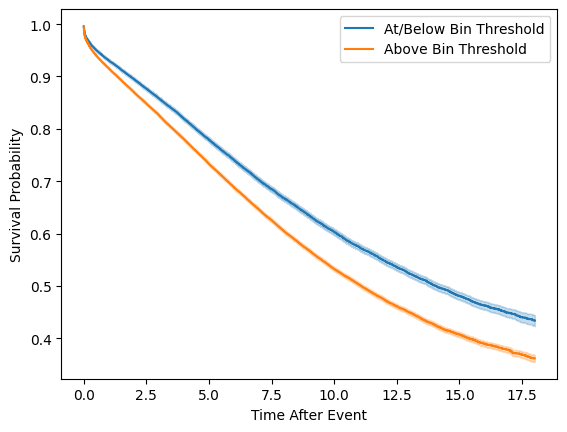

In [11]:
fibers.get_kaplan_meir(data,bin_index,save=True,output_folder=output_folder,data_name=data_name)

### Evaluate Target Bin Using Cox Proportional Hazard Model (adjusting for covariates)

In [12]:
summary = fibers.get_cox_prop_hazard(data, bin_index)
bin_hr = summary['exp(coef)'].iloc[0]
bin_low_CI = summary['exp(coef) lower 95%'].iloc[0]
bin_upper_CI = summary['exp(coef) upper 95%'].iloc[0]
bin_p_val = summary['p'].iloc[0]
print("Bin HR: "+str(bin_hr)+" ("+str(bin_low_CI)+"-"+str(bin_upper_CI)+")")
print("Bin HR p-value: "+str(bin_p_val))
summary.to_csv(output_folder+'/'+'Cox_PH_'+str(bin_index)+'_'+data_name+'.csv', index=False)
summary

Dropped 0 invariant feature columns.
Iteration 1: norm_delta = 6.88e-01, step_size = 0.9500, log_lik = -674771.34752, newton_decrement = 6.48e+03, seconds_since_start = 1.1
Iteration 2: norm_delta = 1.94e-01, step_size = 0.9500, log_lik = -668536.77766, newton_decrement = 1.49e+02, seconds_since_start = 2.1
Iteration 3: norm_delta = 2.00e-02, step_size = 0.9500, log_lik = -668384.89257, newton_decrement = 1.29e+00, seconds_since_start = 3.2
Iteration 4: norm_delta = 1.32e-04, step_size = 1.0000, log_lik = -668383.59315, newton_decrement = 6.65e-05, seconds_since_start = 4.3
Iteration 5: norm_delta = 7.67e-09, step_size = 1.0000, log_lik = -668383.59309, newton_decrement = 3.06e-13, seconds_since_start = 5.4
Convergence success after 5 iterations.
Bin HR: 1.1244951200460804 (1.096566219239266-1.1531353536357138)
Bin HR p-value: 6.02998091557845e-20


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
Bin_0,0.117334,1.124495,0.012832,0.092184,0.142485,1.096566,1.153135,0.0,9.143792,6.029981e-20,63.846408
shared,0.112065,1.118586,0.010199,0.092076,0.132055,1.096448,1.141171,0.0,10.988088,4.360682e-28,90.889433
DCD,0.077905,1.081020,0.014360,0.049761,0.106050,1.051020,1.111878,0.0,5.425229,5.788038e-08,24.042350
DON_AGE,-0.010669,0.989388,0.004817,-0.020111,-0.001227,0.980090,0.998774,0.0,-2.214642,2.678464e-02,5.222450
donage_slope_ge18,0.020325,1.020533,0.004956,0.010612,0.030038,1.010668,1.030494,0.0,4.101222,4.109743e-05,14.570592
dcadcodanox,0.043745,1.044716,0.012457,0.019329,0.068160,1.019517,1.070537,0.0,3.511603,4.454134e-04,11.132567
dcadcodcva,0.068155,1.070532,0.010874,0.046843,0.089468,1.047957,1.093592,0.0,6.267749,3.663045e-10,31.346238
dcadcodcnst,-0.001608,0.998393,0.051353,-0.102258,0.099041,0.902796,1.104112,0.0,-0.031321,9.750135e-01,0.036506
dcadcodoth,0.059343,1.061139,0.027605,0.005239,0.113447,1.005253,1.120132,0.0,2.149748,3.157518e-02,4.985065


### Check and View Any Top Bin Ties

In [13]:
fibers.report_ties()

Only one top performing bin found


***
## Bin Population Examination
### Plot: Basic Bin Population Heatmap

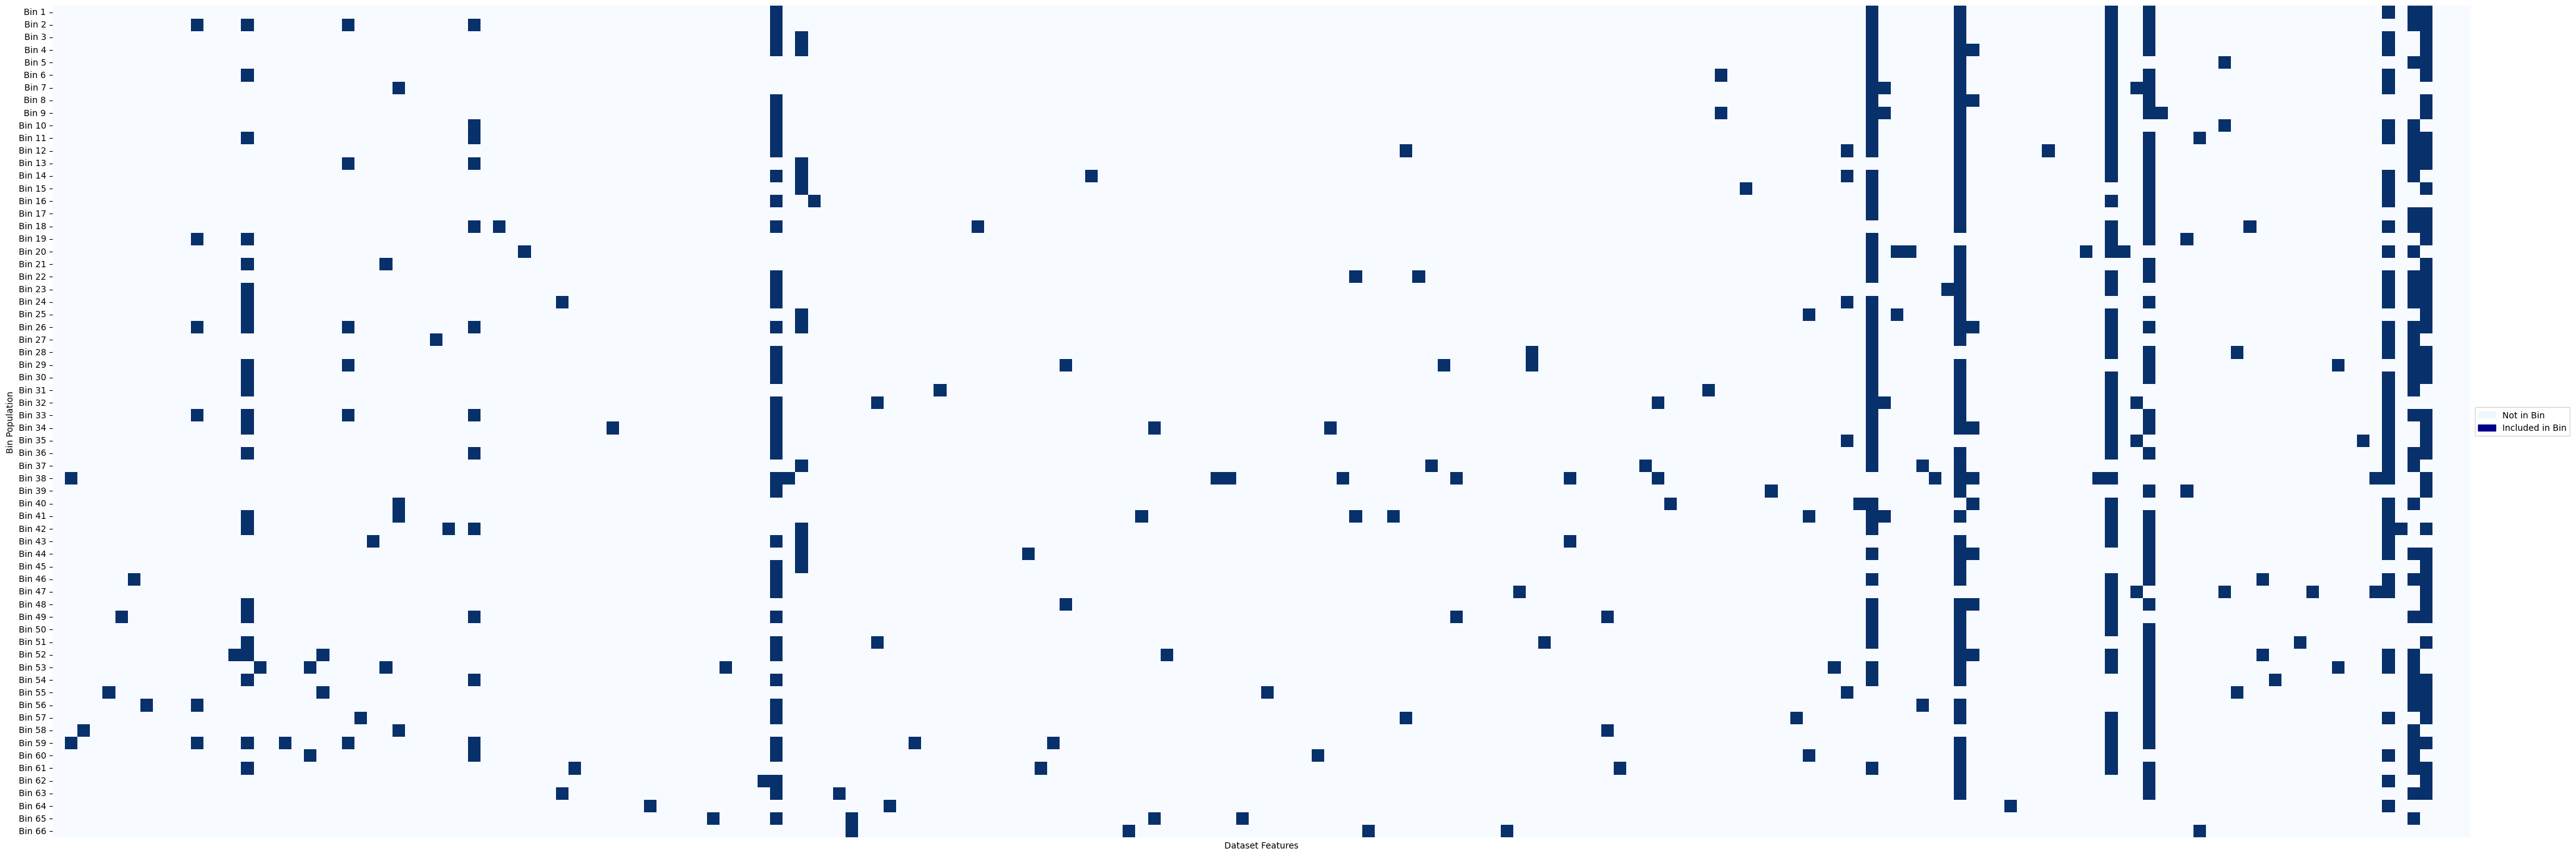

In [14]:
fibers.get_bin_population_heatmap_plot(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Custom Bin Population Heatmap

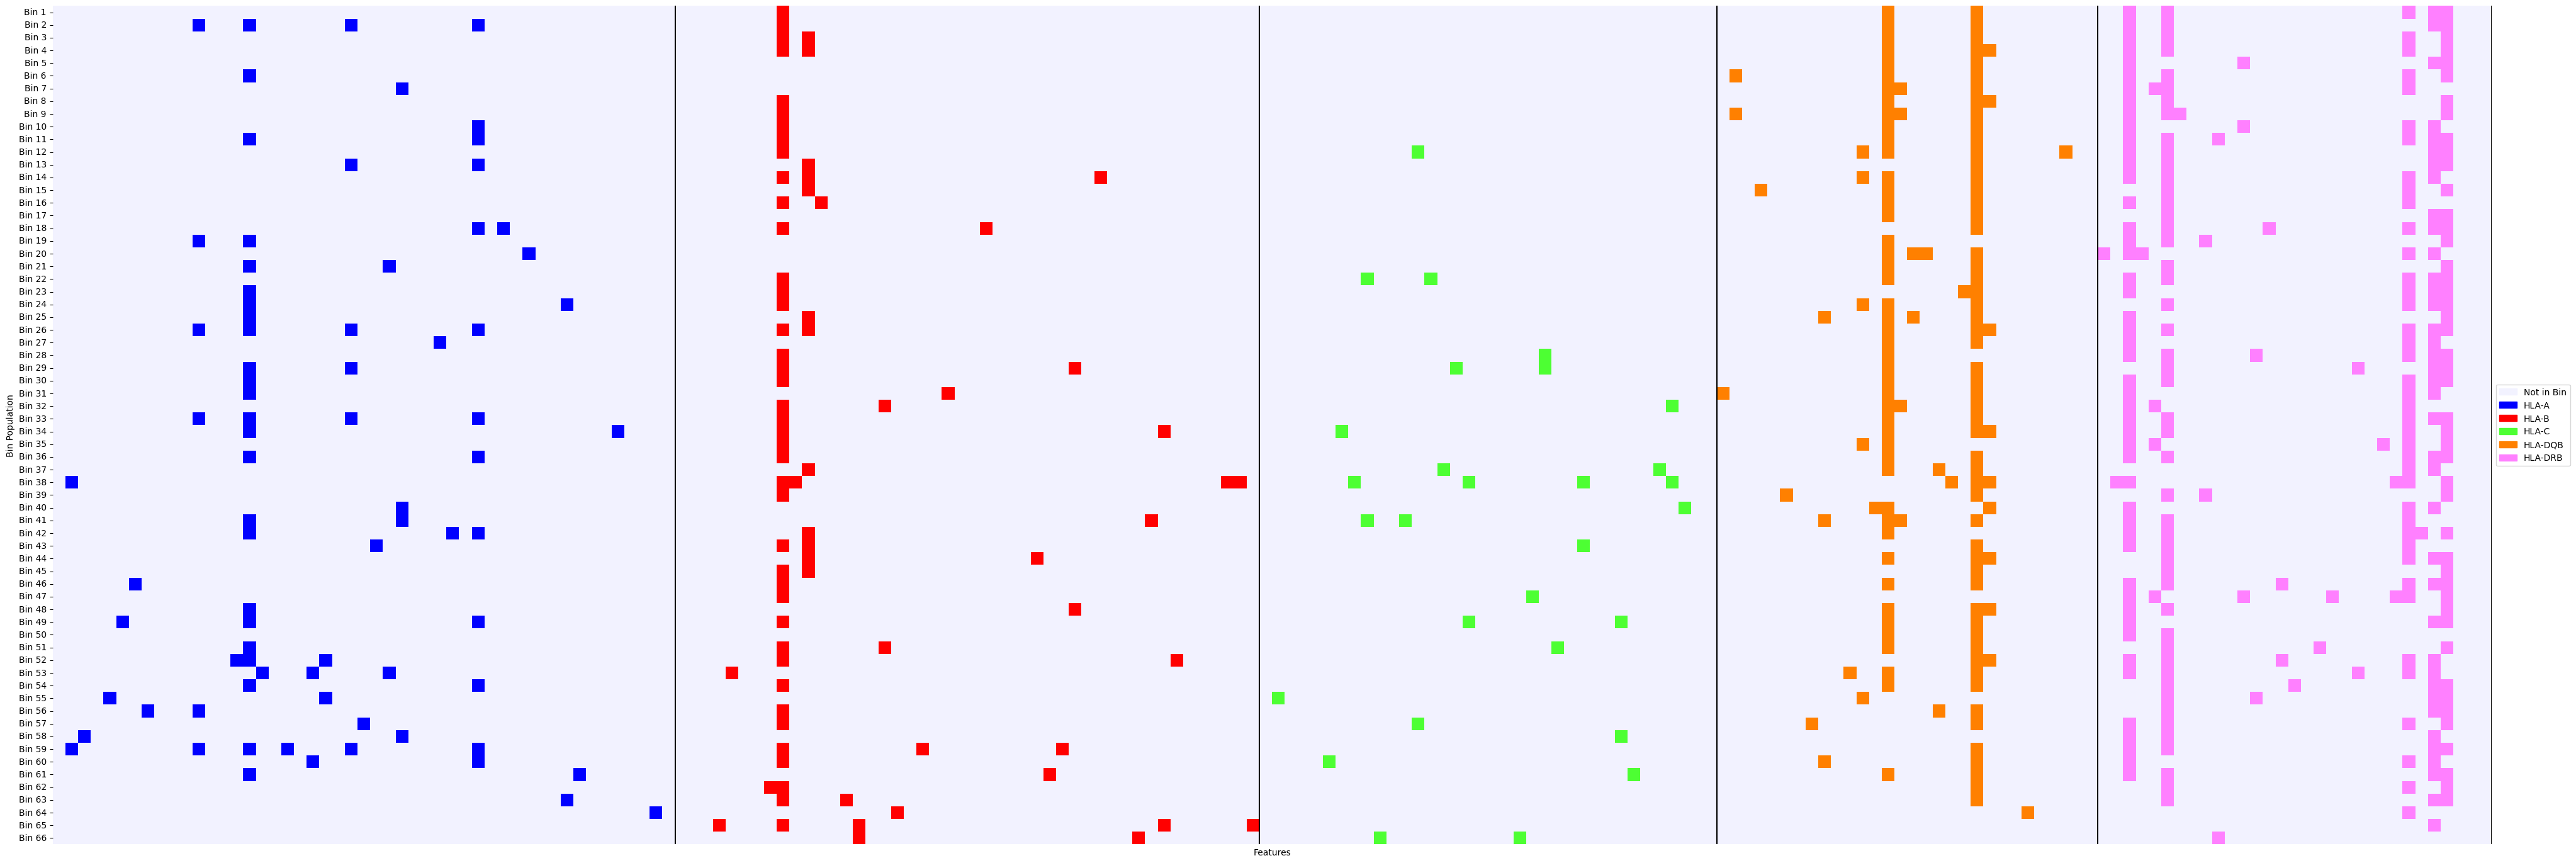

In [15]:
group_names=["A", "B", "C", "DQB", "DRB"]
legend_group_info = ['Not in Bin','HLA-A','HLA-B', 'HLA-C','HLA-DQB','HLA-DRB'] #2 default colors first followed by additional color descriptions in legend
color_features = [['B1', 'B10', 'B100', 'B101', 'B102', 'B103', 'B104', 'B105', 'B106', 'B107', 'B108', 'B109', 'B11', 'B110', 'B111', 'B112', 'B113', 'B114', 'B115', 'B116', 'B117', 'B118', 'B119', 'B12', 'B120', 'B121', 'B122', 'B123', 'B124', 'B125', 'B126', 'B127', 'B128', 'B129', 'B13', 'B130', 'B131', 'B132', 'B133', 'B134', 'B135', 'B136', 'B137', 'B138', 'B139', 'B14', 'B140', 'B141', 'B142', 'B143', 'B144', 'B145', 'B146', 'B147', 'B148', 'B149', 'B15', 'B150', 'B151', 'B152', 'B153', 'B154', 'B155', 'B156', 'B157', 'B158', 'B159', 'B16', 'B160', 'B161', 'B162', 'B163', 'B164', 'B165', 'B166', 'B167', 'B168', 'B169', 'B17', 'B170', 'B171', 'B172', 'B173', 'B174', 'B175', 'B176', 'B177', 'B178', 'B179', 'B18', 'B180', 'B181', 'B182', 'B183', 'B184', 'B185', 'B186', 'B187', 'B188', 'B189', 'B19', 'B190', 'B191', 'B192', 'B193', 'B194', 'B2', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B3', 'B30', 'B31', 'B32', 'B33', 'B34', 'B35', 'B36', 'B37', 'B38', 'B39', 'B4', 'B40', 'B41', 'B42', 'B43', 'B44', 'B45', 'B46', 'B47', 'B48', 'B49', 'B5', 'B50', 'B51', 'B52', 'B53', 'B54', 'B55', 'B56', 'B57', 'B58', 'B59', 'B6', 'B60', 'B61', 'B62', 'B63', 'B64', 'B65', 'B66', 'B67', 'B68', 'B69', 'B7', 'B70', 'B71', 'B72', 'B73', 'B74', 'B75', 'B76', 'B77', 'B78', 'B79', 'B8', 'B80', 'B81', 'B82', 'B83', 'B84', 'B85', 'B86', 'B87', 'B88', 'B89', 'B9', 'B90', 'B91', 'B92', 'B93', 'B94', 'B95', 'B96', 'B97', 'B98', 'B99'],['C1', 'C10', 'C100', 'C101', 'C102', 'C103', 'C104', 'C105', 'C106', 'C107', 'C108', 'C109', 'C11', 'C110', 'C111', 'C112', 'C113', 'C114', 'C115', 'C116', 'C117', 'C118', 'C119', 'C12', 'C120', 'C121', 'C122', 'C123', 'C124', 'C125', 'C126', 'C127', 'C128', 'C129', 'C13', 'C130', 'C131', 'C132', 'C133', 'C134', 'C135', 'C136', 'C137', 'C138', 'C139', 'C14', 'C140', 'C141', 'C142', 'C143', 'C144', 'C145', 'C146', 'C147', 'C148', 'C149', 'C15', 'C150', 'C151', 'C152', 'C153', 'C154', 'C155', 'C156', 'C157', 'C158', 'C159', 'C16', 'C160', 'C161', 'C162', 'C163', 'C164', 'C165', 'C166', 'C167', 'C168', 'C169', 'C17', 'C170', 'C171', 'C172', 'C173', 'C174', 'C175', 'C176', 'C177', 'C178', 'C179', 'C18', 'C180', 'C181', 'C182', 'C183', 'C184', 'C185', 'C186', 'C187', 'C188', 'C189', 'C19', 'C190', 'C191', 'C192', 'C193', 'C194', 'C195', 'C196', 'C197', 'C198', 'C199', 'C2', 'C20', 'C200', 'C201', 'C202', 'C203', 'C204', 'C205', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C3', 'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C4', 'C40', 'C41', 'C42', 'C43', 'C44', 'C45', 'C46', 'C47', 'C48', 'C49', 'C5', 'C50', 'C51', 'C52', 'C53', 'C54', 'C55', 'C56', 'C57', 'C58', 'C59', 'C6', 'C60', 'C61', 'C62', 'C63', 'C64', 'C65', 'C66', 'C67', 'C68', 'C69', 'C7', 'C70', 'C71', 'C72', 'C73', 'C74', 'C75', 'C76', 'C77', 'C78', 'C79', 'C8', 'C80', 'C81', 'C82', 'C83', 'C84', 'C85', 'C86', 'C87', 'C88', 'C89', 'C9', 'C90', 'C91', 'C92', 'C93', 'C94', 'C95', 'C96', 'C97', 'C98', 'C99'],['DQB11', 'DQB110', 'DQB111', 'DQB112', 'DQB113', 'DQB114', 'DQB115', 'DQB116', 'DQB117', 'DQB118', 'DQB119', 'DQB12', 'DQB120', 'DQB121', 'DQB122', 'DQB123', 'DQB124', 'DQB125', 'DQB126', 'DQB127', 'DQB128', 'DQB129', 'DQB13', 'DQB130', 'DQB131', 'DQB132', 'DQB133', 'DQB134', 'DQB135', 'DQB136', 'DQB137', 'DQB138', 'DQB139', 'DQB14', 'DQB140', 'DQB141', 'DQB142', 'DQB143', 'DQB144', 'DQB145', 'DQB146', 'DQB147', 'DQB148', 'DQB149', 'DQB15', 'DQB150', 'DQB151', 'DQB152', 'DQB153', 'DQB154', 'DQB155', 'DQB156', 'DQB157', 'DQB158', 'DQB159', 'DQB16', 'DQB160', 'DQB161', 'DQB162', 'DQB163', 'DQB164', 'DQB165', 'DQB166', 'DQB167', 'DQB168', 'DQB169', 'DQB17', 'DQB170', 'DQB171', 'DQB172', 'DQB173', 'DQB174', 'DQB175', 'DQB176', 'DQB177', 'DQB178', 'DQB179', 'DQB18', 'DQB180', 'DQB181', 'DQB182', 'DQB183', 'DQB184', 'DQB185', 'DQB186', 'DQB187', 'DQB188', 'DQB189', 'DQB19', 'DQB190', 'DQB191', 'DQB192', 'DQB193', 'DQB194'],[ 'DRB11', 'DRB110', 'DRB111', 'DRB112', 'DRB113', 'DRB114', 'DRB115', 'DRB116', 'DRB117', 'DRB118', 'DRB119', 'DRB12', 'DRB120', 'DRB121', 'DRB122', 'DRB123', 'DRB124', 'DRB125', 'DRB126', 'DRB127', 'DRB128', 'DRB129', 'DRB13', 'DRB130', 'DRB131', 'DRB132', 'DRB133', 'DRB134', 'DRB135', 'DRB136', 'DRB137', 'DRB138', 'DRB139', 'DRB14', 'DRB140', 'DRB141', 'DRB142', 'DRB143', 'DRB144', 'DRB145', 'DRB146', 'DRB147', 'DRB148', 'DRB149', 'DRB15', 'DRB150', 'DRB151', 'DRB152', 'DRB153', 'DRB154', 'DRB155', 'DRB156', 'DRB157', 'DRB158', 'DRB159', 'DRB16', 'DRB160', 'DRB161', 'DRB162', 'DRB163', 'DRB164', 'DRB165', 'DRB166', 'DRB167', 'DRB168', 'DRB169', 'DRB17', 'DRB170', 'DRB171', 'DRB172', 'DRB173', 'DRB174', 'DRB175', 'DRB176', 'DRB177', 'DRB178', 'DRB179', 'DRB18', 'DRB180', 'DRB181', 'DRB182', 'DRB183', 'DRB184', 'DRB185', 'DRB186', 'DRB187', 'DRB188', 'DRB189', 'DRB19', 'DRB190', 'DRB191', 'DRB192', 'DRB193', 'DRB194']]
colors = [(1, 0, 0),(0.3,1,0.2),(1, 0.5, 0),(1,0.5,1)] # blue,red,green,orange,pink ---Alternatively orange (1, 0.5, 0)
default_colors = [(.95, .95, 1),(0, 0, 1)] #very light blue and blue
max_bins = 100
max_features = 100

fibers.get_custom_bin_population_heatmap_plot(group_names,legend_group_info,color_features,colors,default_colors,max_bins,max_features,save=True,output_folder=output_folder,data_name=data_name)

### Plot: Bin Population Pareto Front
In plot, dot colors indicate the 'group strata prop' of the given bin, and dot size is relative to the 'group threshold of that bin'.

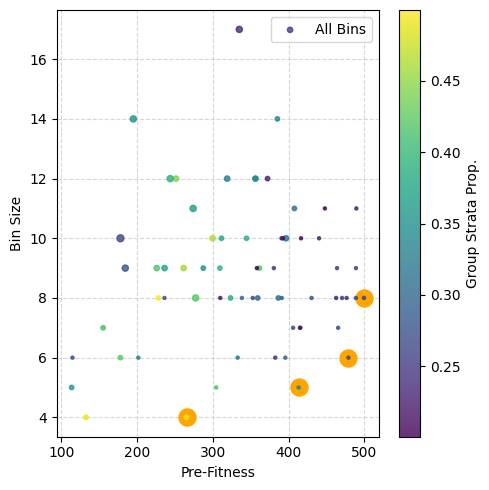

In [16]:
fibers.get_pareto_plot(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Estimated Feature Tracking Scores
These scores accumulate throughout the training process, and do not nesessarily reflect feature importance of individual bins or the final bin population.

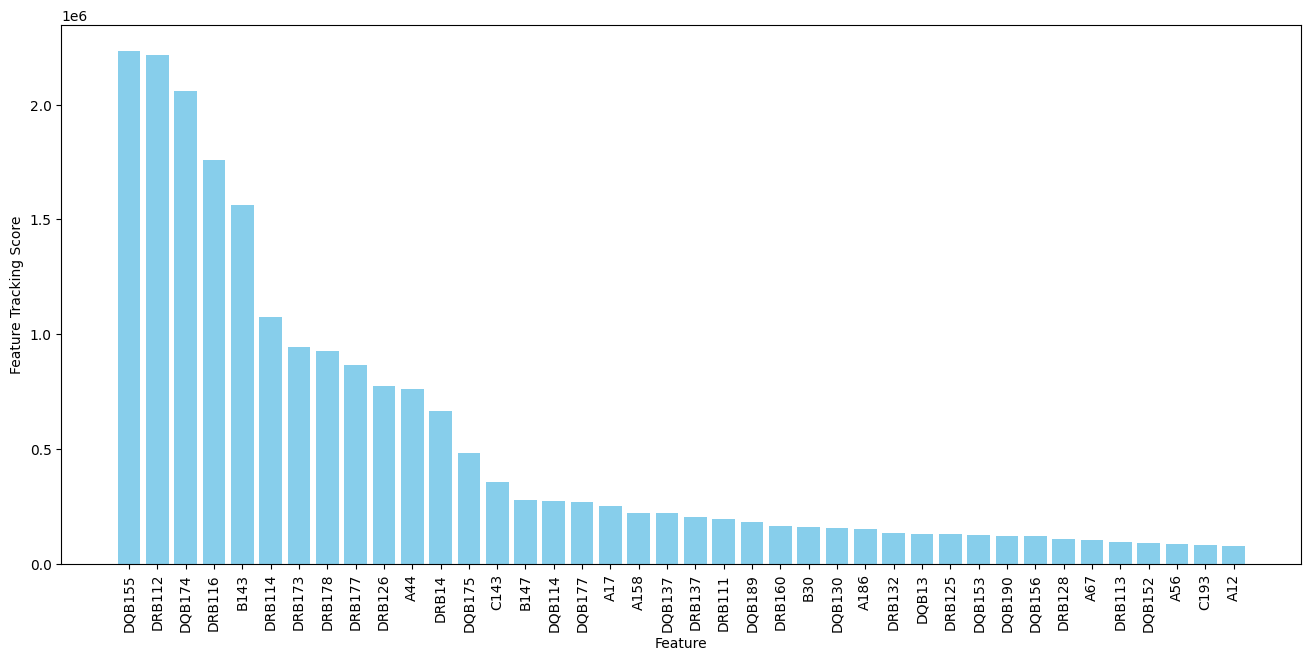

In [17]:
fibers.get_feature_tracking_plot(max_features=40,save=True,output_folder=output_folder,data_name=data_name)

### Plot: Dataset Covariate Residuals (if applicable)

In [18]:
if fibers.fitness_metric == 'residuals' or fibers.fitness_metric == 'log_rank_residuals':  
    fibers.get_residuals_histogram(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Bin Log-Rank Scores Vs. Residuals Scores (if applicable)
In plot, dot colors indicate the 'group strata prop' of the given bin, and dot size is relative to the 'group threshold of that bin'.

In [19]:
if fibers.fitness_metric == 'log_rank_residuals':
    fibers.get_log_rank_residuals_plot(save=True,output_folder=output_folder,data_name=data_name)

###  Evaluate All Bins in Population using Cox PH Model (Can be slow)

In [20]:
fibers.calculate_cox_prop_hazards(data)

Dropped 0 invariant feature columns.
Iteration 1: norm_delta = 8.93e-02, step_size = 0.9500, log_lik = -674771.34752, newton_decrement = 2.50e+02, seconds_since_start = 1.2
Iteration 2: norm_delta = 8.87e-03, step_size = 0.9500, log_lik = -674515.78407, newton_decrement = 2.25e+00, seconds_since_start = 2.5
Iteration 3: norm_delta = 4.89e-04, step_size = 0.9500, log_lik = -674513.53314, newton_decrement = 6.78e-03, seconds_since_start = 3.7
Iteration 4: norm_delta = 1.40e-07, step_size = 1.0000, log_lik = -674513.52636, newton_decrement = 5.54e-10, seconds_since_start = 4.9
Convergence success after 4 iterations.
Iteration 1: norm_delta = 6.88e-01, step_size = 0.9500, log_lik = -674771.34752, newton_decrement = 6.48e+03, seconds_since_start = 1.2
Iteration 2: norm_delta = 1.94e-01, step_size = 0.9500, log_lik = -668536.77766, newton_decrement = 1.49e+02, seconds_since_start = 2.2
Iteration 3: norm_delta = 2.00e-02, step_size = 0.9500, log_lik = -668384.89257, newton_decrement = 1.29e+0

### Plot: Bin Log-Rank Scores Vs. Adjusted Hazard Ratios (if applicable)
In plot, dot colors indicate the 'group strata prop' of the given bin, and dot size is relative to the 'group threshold of that bin'.

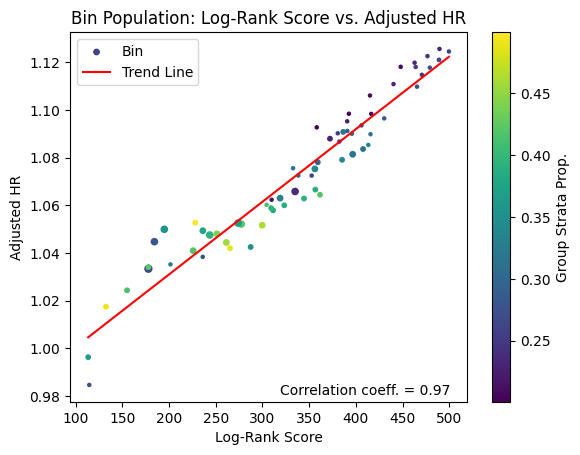

In [21]:
if fibers.fitness_metric == 'log_rank' or fibers.fitness_metric == 'log_rank_residuals':  
    fibers.get_log_rank_adj_HR_plot(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Bin Adjusted Hazard Ratios Vs. Residuals Scores (if applicable)
In plot, dot colors indicate the 'group strata prop' of the given bin, and dot size is relative to the 'group threshold of that bin'.

In [22]:
if fibers.fitness_metric == 'residuals' or fibers.fitness_metric == 'log_rank_residuals':   
    fibers.get_adj_HR_residuals_plot(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Bin Adjusted Hazard Ratios Vs. Log Rank * Residuals Scores (if applicable)
In plot, dot colors indicate the 'group strata prop' of the given bin, and dot size is relative to the 'group threshold of that bin'.

In [23]:
if fibers.fitness_metric == 'log_rank_residuals':   
    fibers.get_adj_HR_metric_product_plot(save=True,output_folder=output_folder,data_name=data_name)

***
## History of Bin Evolution (Top Bin Each Generation)
### Plot: Fitness of top bin across training iterations

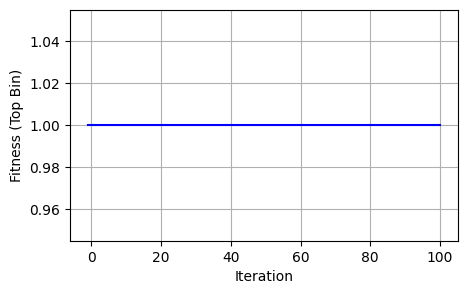

In [24]:
fibers.get_fitness_progress_plot()

### Plot: Scoring Metric and Pre-Fitness of top bin across training iterations

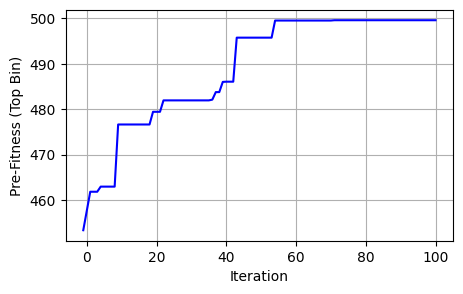

In [25]:
fibers.get_perform_progress_plot(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Normalized Top-Bin Stats Across Training Iterations

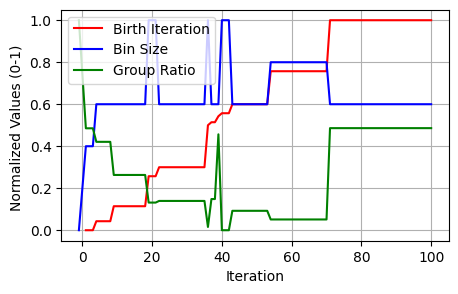

In [26]:
fibers.get_misc_progress_plot(save=True,output_folder=output_folder,data_name=data_name)

### View Top Bin Information Across all Iterations/Generations

In [27]:
fibers.perform_track_df

,Iteration,Top Bin,Threshold,Fitness,Pre-Fitness,Log-Rank Score,Log-Rank p-value,Bin Size,Group Ratio,Count At/Below Threshold,Count Below Threshold,Birth Iteration,Residuals Score,Residuals p-value,Elapsed Time
0,-1,"[A17, DQB155, DQB174, DRB112, DRB114]",0,1.0,453.347184,453.347184,1.347975e-100,5,0.291936,48629,117945,NaN,None,None,61.967254
1,1,"[A17, DQB155, DQB174, DQB175, DRB112, DRB114, ...",0,1.0,461.820418,461.820418,1.930806e-102,7,0.259614,43245,123329,1.0,None,None,92.984543
2,2,"[A17, DQB155, DQB174, DQB175, DRB112, DRB114, ...",0,1.0,461.820418,461.820418,1.930806e-102,7,0.259614,43245,123329,1.0,None,None,103.215481
3,3,"[A17, DQB155, DQB174, DQB175, DRB112, DRB114, ...",0,1.0,461.820418,461.820418,1.930806e-102,7,0.259614,43245,123329,1.0,None,None,113.490481
4,4,"[DQB155, DQB174, DQB175, DRB112, DRB114, DRB11...",0,1.0,462.945923,462.945923,1.098530e-102,8,0.255568,42571,124003,4.0,None,None,123.715264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,"[B143, DQB155, DQB174, DRB112, DRB116, DRB173,...",0,1.0,499.587190,499.587190,1.168933e-110,8,0.259662,43253,123321,71.0,None,None,1082.925991
97,97,"[B143, DQB155, DQB174, DRB112, DRB116, DRB173,...",0,1.0,499.587190,499.587190,1.168933e-110,8,0.259662,43253,123321,71.0,None,None,1093.171297
98,98,"[B143, DQB155, DQB174, DRB112, DRB116, DRB173,...",0,1.0,499.587190,499.587190,1.168933e-110,8,0.259662,43253,123321,71.0,None,None,1103.528137
99,99,"[B143, DQB155, DQB174, DRB112, DRB116, DRB173,...",0,1.0,499.587190,499.587190,1.168933e-110,8,0.259662,43253,123321,71.0,None,None,1135.682406


***
## Save Bin Population
### Save Bin Population Details to CSV

In [28]:
pop_df = fibers.get_pop()
pop_df.to_csv(output_folder+'/'+'Pop_'+data_name+'.csv', index=False)

### Pickle Trained FIBERS Object (For Future Use)

In [29]:
with open(output_folder+'/'+data_name+'.pickle', 'wb') as f:
    pickle.dump(fibers, f)

***
## Transforming Bins Into New Features (i.e. Feature Learning) and Save as New CSV Files
### Transform Bins Using Total Sums (i.e. Respective Bin Thresholds Not Applied)

In [30]:
tdf = fibers.transform(data,full_sums=True)
tdf.to_csv(output_folder+'/'+'Transformed_FullSums_'+data_name+'.csv', index=False)
tdf

Dropped 0 invariant feature columns.


,Bin_0,Bin_1,Bin_2,Bin_3,Bin_4,Bin_5,Bin_6,Bin_7,Bin_8,Bin_9,...,Bin_58,Bin_59,Bin_60,Bin_61,Bin_62,Bin_63,Bin_64,Bin_65,graftyrs,grf_fail
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,3,1,2,3.233490,1
1,6,5,6,6,5,7,6,5,7,5,...,5,4,5,4,2,3,3,4,16.003176,0
2,0,0,0,0,1,0,0,0,0,1,...,1,1,0,1,0,2,1,1,17.002519,0
3,4,4,4,5,6,5,4,5,5,6,...,3,5,5,1,1,2,0,1,1.319680,1
4,3,3,3,4,3,4,3,4,4,3,...,3,4,5,1,1,2,3,9,6.349250,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166569,4,8,4,4,4,6,5,4,5,5,...,8,4,7,1,1,2,2,3,0.501040,0
166570,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,2,0.501040,0
166571,2,5,2,2,3,4,3,2,3,4,...,6,3,5,1,2,2,5,5,0.501040,0
166572,2,2,2,3,3,2,2,3,2,3,...,2,3,3,1,1,1,1,2,0.501040,0


### Transform Bins Using Respective Bin Threshold (i.e. 0 = At/Under Threshold Group and 1 = Over Threshold Group)

In [31]:
tdf = fibers.transform(data,full_sums=False)
tdf.to_csv(output_folder+'/'+'Transformed_Threshold'+data_name+'.csv', index=False)
tdf

Dropped 0 invariant feature columns.


,Bin_0,Bin_1,Bin_2,Bin_3,Bin_4,Bin_5,Bin_6,Bin_7,Bin_8,Bin_9,...,Bin_58,Bin_59,Bin_60,Bin_61,Bin_62,Bin_63,Bin_64,Bin_65,graftyrs,grf_fail
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,1,1,1,3.233490,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,16.003176,0
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,1,0,17.002519,0
3,1,1,1,1,1,1,1,1,1,1,...,0,1,1,0,0,1,0,0,1.319680,1
4,1,1,1,1,1,1,1,1,1,1,...,0,1,1,0,0,1,1,1,6.349250,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166569,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,1,1,1,0.501040,0
166570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.501040,0
166571,1,1,1,1,1,1,1,1,1,1,...,1,0,1,0,1,1,1,1,0.501040,0
166572,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,1,0.501040,0


***
## Open Pickled FIBERS Object (Example)

In [32]:
with open(output_folder+'/'+data_name+'.pickle', 'rb') as f:
    fibers = pickle.load(f)

fibers.get_bin_report(bin_index)

,0
Features in Bin:,"[B143, DQB155, DQB174, DRB112, DRB116, DRB173,..."
Threshold:,0
Fitness,1.0
Pre-Fitness:,499.58719
Log-Rank Score:,499.58719
Log-Rank p-value:,0.0
Bin Size:,8
Group Ratio:,0.259662
Count At/Below Threshold:,43253
Count Above Threshold:,123321
